In [140]:
import pandas as pd
import numpy as np

In [227]:
df=pd.read_csv("librairies.csv")
df=df.groupby(by="codeCommuneEtablissement").count()[["long"]]
df.rename(columns = {'long':'number'}, inplace = True)
df=df.reset_index(drop = False)
df_vie=pd.read_csv("niveau_de_vie_commune.csv",sep=';')
df_vie=df_vie.drop([i for i in range(11163,11524)])
df_vie['CODGEO'] = pd.to_numeric(df_vie['CODGEO'])

In [228]:
df=df.merge(df_vie, left_on='codeCommuneEtablissement', right_on='CODGEO')
df['MED14'] = df['MED14'].str.replace(",",".", regex=True)
df['MED14'] = pd.to_numeric(df['MED14'])
df

,codeCommuneEtablissement,number,CODGEO,LIBGEO,MED14
0,75101,19,75101,Paris 1er Arrondissement,31574.5
1,75102,16,75102,Paris 2e Arrondissement,29296.0
2,75103,18,75103,Paris 3e Arrondissement,30560.7
3,75104,25,75104,Paris 4e Arrondissement,30385.5
4,75105,81,75105,Paris 5e Arrondissement,32717.5
...,...,...,...,...,...
222,95555,2,95555,Saint-Gratien,21552.9
223,95572,1,95572,Saint-Ouen-l'Aumône,19233.3
224,95585,1,95585,Sarcelles,14852.0
225,95598,1,95598,Soisy-sous-Montmorency,23479.5


In [229]:
df_pop=pd.read_excel("ensemble.xlsx", sheet_name="Communes", header=0, names=None, index_col=None, usecols=None)
df_pop.drop([i for i in range(6)],inplace=True)
for k,name in enumerate(df_pop.columns):
    df_pop.rename(columns = {name:df_pop.iloc[0,k]}, inplace = True)
df_pop.drop(6,inplace=True)
df_pop["Commune"]=df_pop["Code département"]+df_pop["Code commune"]
df_pop=df_pop[df_pop["Code département"] != '2A']
df_pop=df_pop[df_pop["Code département"] != '2B']
df_pop['Commune'] = pd.to_numeric(df_pop['Commune'])
df_pop

,Code région,Nom de la région,Code département,Code arrondissement,Code canton,Code commune,Nom de la commune,Population municipale,Population comptée à part,Population totale,Commune
7,84,Auvergne-Rhône-Alpes,01,2,08,001,L' Abergement-Clémenciat,771,18,789,1001
8,84,Auvergne-Rhône-Alpes,01,1,01,002,L' Abergement-de-Varey,253,1,254,1002
9,84,Auvergne-Rhône-Alpes,01,1,01,004,Ambérieu-en-Bugey,14204,382,14586,1004
10,84,Auvergne-Rhône-Alpes,01,2,22,005,Ambérieux-en-Dombes,1720,24,1744,1005
11,84,Auvergne-Rhône-Alpes,01,1,04,006,Ambléon,112,6,118,1006
...,...,...,...,...,...,...,...,...,...,...,...
34995,04,La Réunion,974,3,08,419,Sainte-Rose,6296,76,6372,974419
34996,04,La Réunion,974,1,04,420,Sainte-Suzanne,23718,221,23939,974420
34997,04,La Réunion,974,3,06,421,Salazie,7224,74,7298,974421
34998,04,La Réunion,974,2,99,422,Le Tampon,79385,1001,80386,974422


In [230]:
df=df.merge(df_pop, left_on='codeCommuneEtablissement', right_on="Commune")
df=df[['number','MED14','Population totale']]
df['number par pop']=df['number']/df['Population totale']

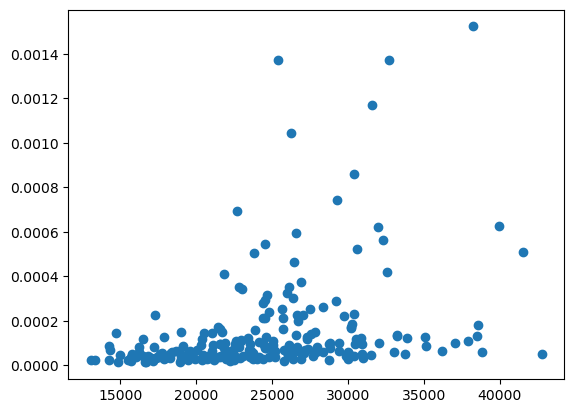

In [231]:
import matplotlib.pyplot as plt
plt.scatter(df.MED14,df['number par pop'])
plt.show()

In [232]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X,Y=np.transpose(np.array([df.MED14])),df['number par pop']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
pred = regr.predict(X)
print("Coefficients: \n", regr.coef_)
print("Coefficient of determination: %.2f" % r2_score(Y, pred))

Coefficients: 
 [1.35481251e-08]
Coefficient of determination: 0.12
